<center><font size = "10"> Week 3 - Morphologies <center>
<center><font size = "8">Tutorial 03: Morphometrics<center>

<font size ="3"><font color='blue'>In this tutorial you will learn:
    
<font size ="3"><font color='blue'>- How to perform analysis on morphologies
    
<font size ="3"><font color='blue'>- How to plot some results

<font size ="3">There are two types of features, the neuron and neurite features.

<font size ="3">- Neurite features can be extracted from a single neurite, a list of neurites or a neuron.

<font size ="3">- Neuron features can only be extracted from a whole neuron, because some additional info is usually required (e.g. distance from soma).

In [1]:
# import the packages
import matplotlib.pyplot as plt
import neurom as nm
import numpy as np

# Define the paths in which the data file is
good_neuron = "input/example_morphologies/Fluo55_low.asc"
neuron = nm.load_morphology(good_neuron)

<font size ="3">All features can be called through the neurom.get function

In [2]:
# help(nm.features.neurite)
help(nm.features.morphology)

Help on module neurom.features.morphology in neurom.features:

NAME
    neurom.features.morphology - Morphology features.

DESCRIPTION
    Any public function from this namespace can be called via the features mechanism. If calling
    directly the function in this namespace can only accept a morphology as its input. If you want to
    apply it to a morphology population then you must use the features mechanism e.g. ``features.get``.
    The features mechanism does not allow you to apply these features to neurites.
    
    >>> import neurom
    >>> from neurom import features
    >>> m = neurom.load_morphology('path/to/morphology')
    >>> features.get('soma_surface_area', m)
    >>> population = neurom.load_morphologies('path/to/morphs')
    >>> features.get('sholl_crossings', population)
    
    For more details see :ref:`features`.

FUNCTIONS
    aspect_ratio(morph, neurite_type=<NeuriteType.all: 32>, projection_plane='xy')
        Calculates the min/max ratio of the principal dir

<font size = "3">Now let's see how we can use it to make some measurements.

In [3]:
# Extract section_lengths
section_lengths_neuron = nm.get("section_lengths", neuron)
print("Section lengths: \n", section_lengths_neuron[:10])

# Extract the local bifurcation angles
local_bif_angles = nm.get("local_bifurcation_angles", neuron)
print("\nSection local bifurcation angles: \n", local_bif_angles[:10])

Section lengths: 
 [125.130775, 124.34029, 163.31493, 23.143269, 13.671525, 5.4365153, 7.4279294, 122.31117, 223.81792, 615.7427]

Section local bifurcation angles: 
 [1.875139019069966, 0.4293747783741623, 1.284743192501375, 0.6993977597375743, 2.837939292380174, 2.0113672381924954, 1.9660023347452151, 2.571552693915766, 1.2229657259308395, 1.81106277089467]


In [4]:
try:
    # this must err because no soma is available
    nm.get('soma_radius', neuron.neurites)

except nm.exceptions.NeuroMError:
    print ("Soma was not found. Input object is wrong.")


Soma was not found. Input object is wrong.


## Select Neurite Types

<font size ="3">The previous examples treated all neurites in the same way. NeuroM allows you to extract morphometrics for a selected type of trees.

In [5]:
dir(nm.NeuriteType)

['__abs__',
 '__add__',
 '__and__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__iter__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__members__',
 '__mod__',
 '__module__',
 '__mul__',
 '__name__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__qualname__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '__xor__',
 

In [6]:
# Extract the section lengths of axonal trees
ax_section_lengths = nm.get("section_lengths", neuron, neurite_type=nm.NeuriteType.axon)

# Extract the section lengths of basal dendrite trees
ba_section_lengths = nm.get(
    "section_lengths", neuron, neurite_type=nm.NeuriteType.basal_dendrite
)

# Extract the section lengths of apical dendrite trees
ap_section_lengths = nm.get(
    "section_lengths", neuron, neurite_type=nm.NeuriteType.apical_dendrite
)

print("axonal ", ax_section_lengths)
print("\n basal  ", ba_section_lengths)
print("\n apical ", ap_section_lengths)
print("\n total_axonal_length =", np.sum(ax_section_lengths))

axonal  [125.130775, 124.34029, 163.31493, 23.143269, 13.671525, 5.4365153, 7.4279294, 122.31117, 223.81792, 615.7427, 195.0153, 7.096019, 11.986317, 98.99915, 36.760937, 141.66231, 580.349, 82.78783, 15.272869, 127.34694, 19.792427, 19.010077, 168.31706, 78.61101, 26.140408, 260.15955, 36.361374, 464.41302, 10.992306, 642.83264, 121.58131, 540.0194, 57.40644, 27.629799, 12.967404, 47.25568, 78.4569, 163.90337, 420.84552, 184.7097, 163.84958, 57.011177, 49.27366, 28.759943, 51.45605]

 basal   [41.811234, 10.011525, 115.59085, 70.33538, 144.30688, 52.76976, 129.13441, 18.11257, 173.164, 110.68129, 5.711342, 49.193733, 13.749815, 46.360863, 20.812138, 23.489546, 44.268158, 22.000216, 231.3402, 246.50146, 11.931663, 8.91487, 45.685993, 112.93146, 186.83282, 45.91397, 69.29042, 142.2586, 28.784508, 196.75507, 63.82941, 19.69787, 210.32109, 7.946871, 186.06429, 10.399862, 18.440817, 249.0975]

 apical  [10.321835, 13.442835, 240.1161, 45.80106, 211.58398, 118.88796, 34.210938, 103.32352, 8

## Let's plot the results

In [7]:
def histogram(data):
    """Generates a histogram in a new figure"""
    # create an image with one subplot
    f, ax = plt.subplots(1, 1, figsize=(5, 5))

    # create a histogram with specified bins and normalized
    ax.hist(data, bins=10)
    ax.set_title(
        feature.replace("_", " ")
    )  # replace the underscores with spaces in the string
    ax.set_xlabel("length (um)")
    ax.set_ylabel("density")

    return f, ax


def boxplot(data):
    """Generates a boxplot in a new figure"""
    # create an image with one subplot
    f, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.boxplot(data)  
    ax.set_ylabel("length (um)")

    return f, ax

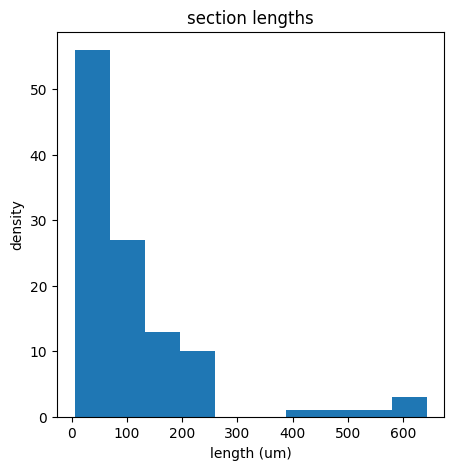

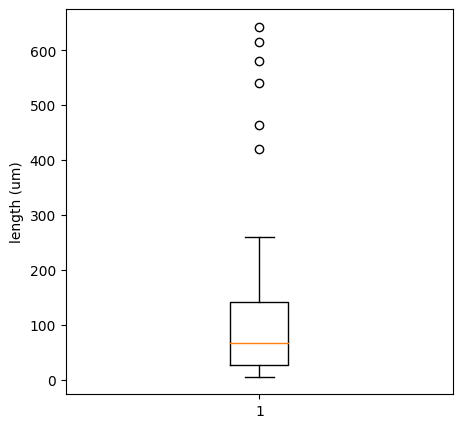

In [8]:
feature = "section_lengths"
values = nm.get(feature, neuron)

histogram(values)
boxplot(values);